<a href="https://colab.research.google.com/github/harsha0062/ml_learning/blob/main/Power_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PowerTransformer

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml -working/concrete_data.csv')

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.shape

(1030, 9)

In [6]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [7]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [21]:
x=df.drop(columns=['Strength'])
y=df.iloc[:,-1]


In [22]:
x.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
10,198.6,132.4,0.0,192.0,0.0,978.4,825.5,90
560,220.8,147.2,0.0,185.7,0.0,1055.0,744.3,28
553,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7
198,194.7,0.0,100.5,165.6,7.5,1006.4,905.9,100
267,212.0,0.0,124.8,159.0,7.8,1085.4,799.5,56


In [23]:
y.sample(5)

,Strength
394,52.30
660,31.02
419,16.88
112,56.10
239,13.36


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
# applying Regression without any transformation
lr=LinearRegression()

lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

r2_score(y_test,y_pred)

0.627553179231485

In [26]:
# cross checking with cross val score
lr=LinearRegression()
c=(np.mean(cross_val_score(lr,x,y,scoring='r2')))
value=float(c)
value

0.46099404916628606

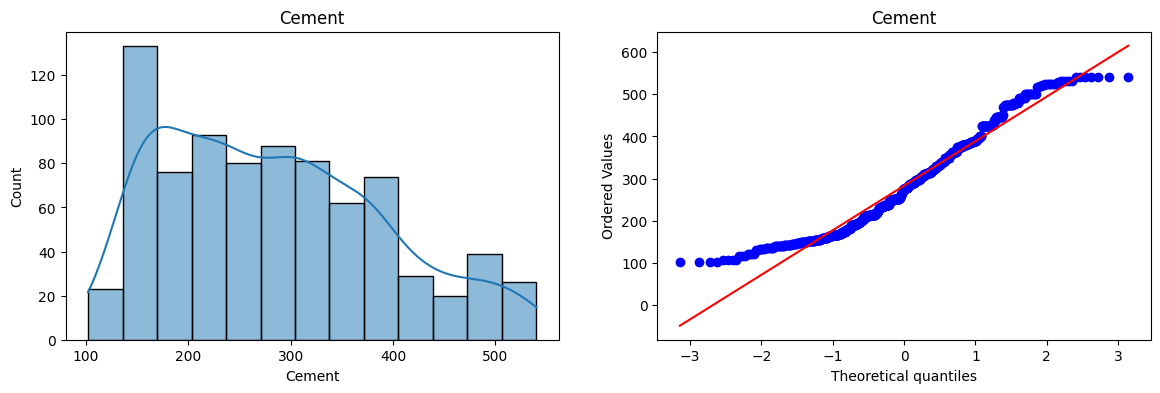

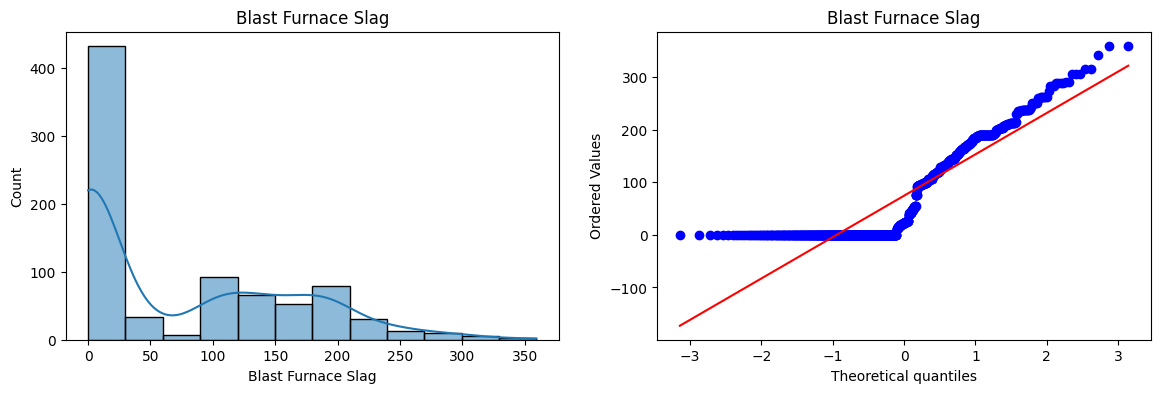

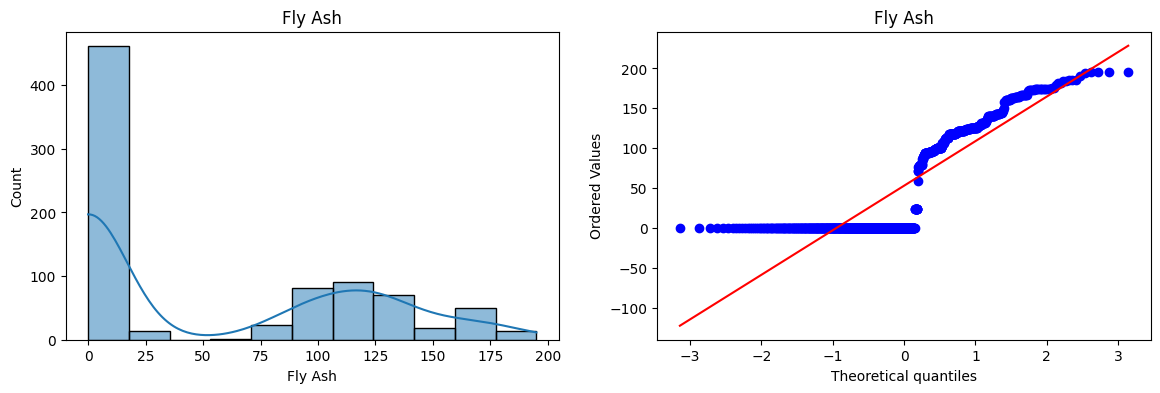

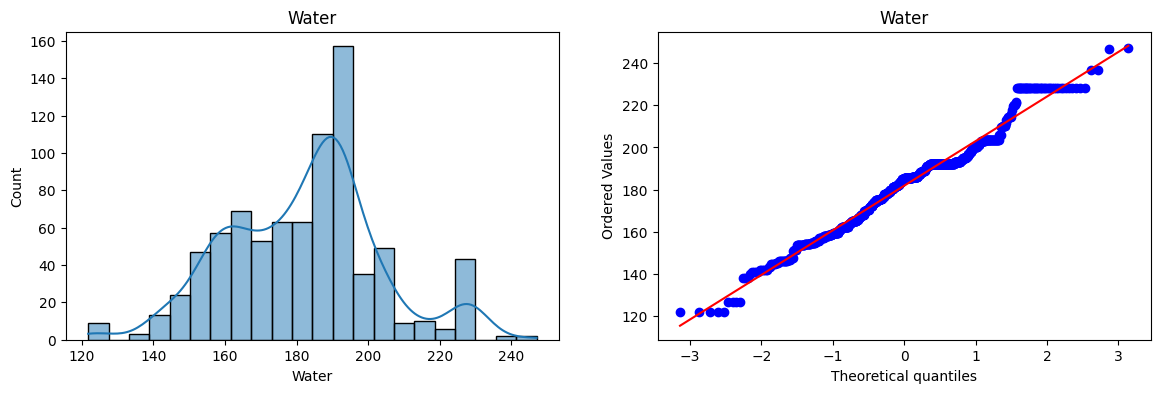

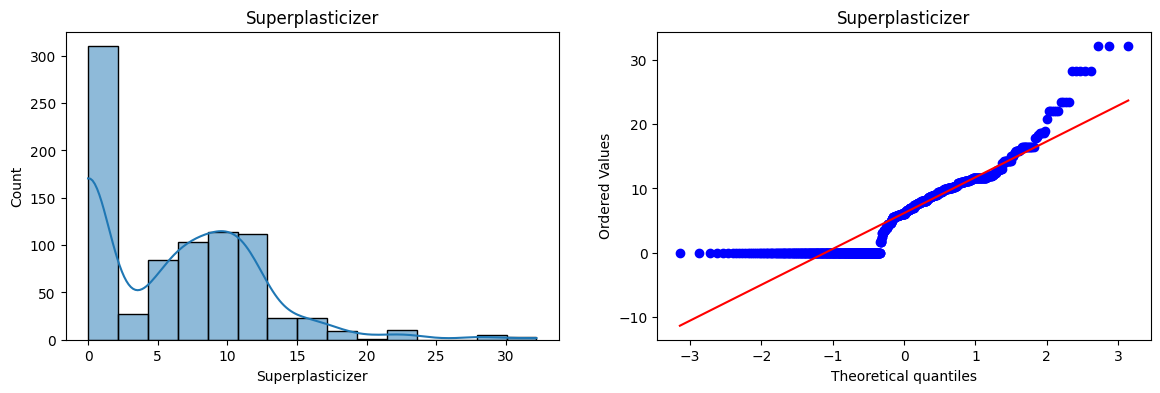

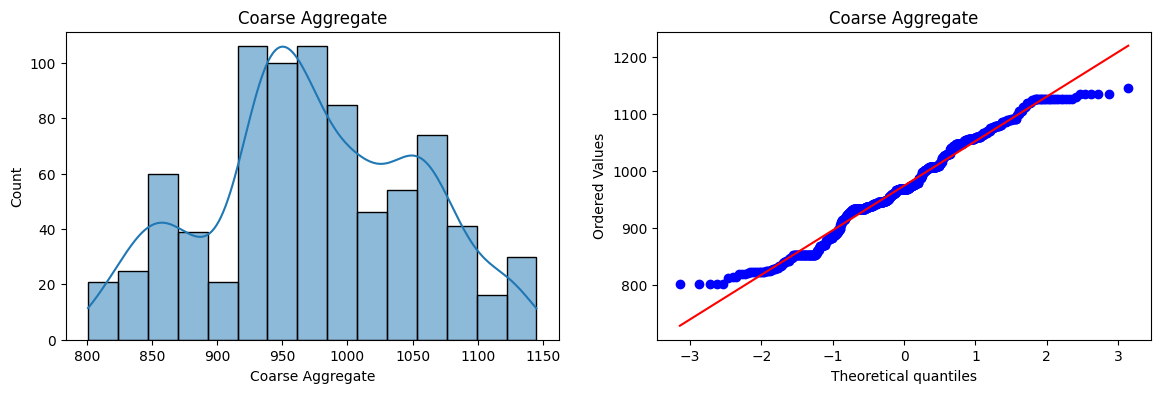

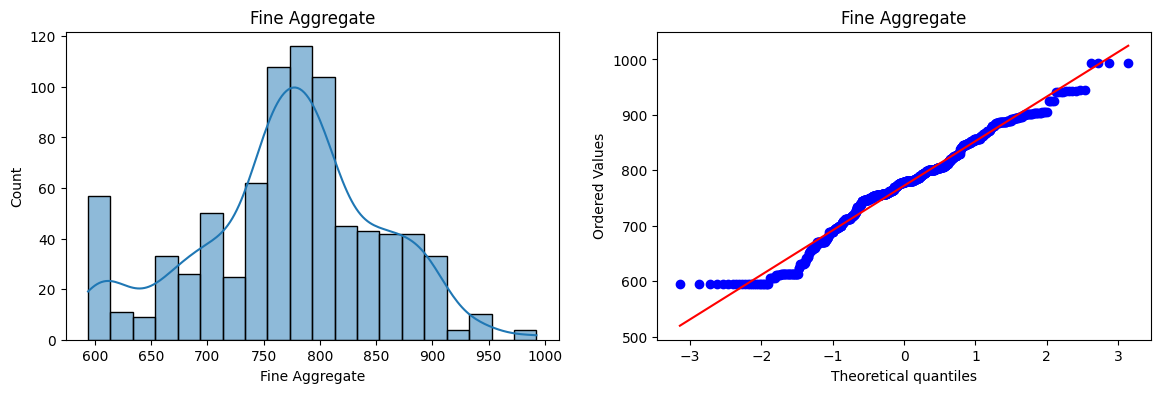

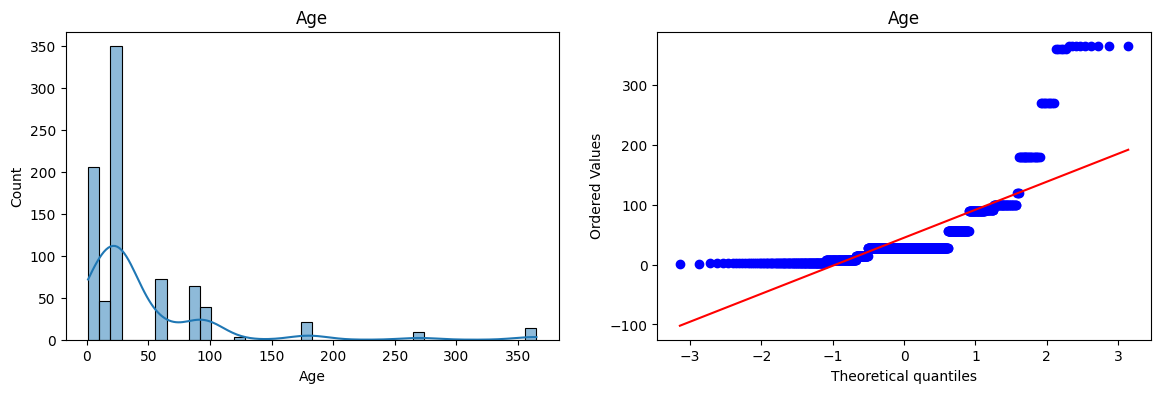

In [28]:
# plotting the distplots wothout any transformation
for col in x_train.columns:
    plt.figure(figsize=(14,4))

    plt.subplot(1,2,1)
    sns.histplot(x_train[col], kde=True)
    plt.title(col)

    plt.subplot(1,2,2)
    stats.probplot(x_train[col], dist='norm', plot=plt)
    plt.title(col)

    plt.show()


In [31]:
# applying box-cox transform
pt=PowerTransformer(method='box-cox')

x_train_transformed=pt.fit_transform(x_train+0.00001)
x_test_transformed=pt.transform(x_test+0.00001)

pd.DataFrame({'cols':x_train.columns,'box_cox_lambda':pt.lambdas_})

,cols,box_cox_lambda
0,Cement,0.177025
1,Blast Furnace Slag,0.027842
2,Fly Ash,-0.044554
3,Water,0.772682
4,Superplasticizer,0.113892
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066630


In [32]:
# Applying Linear Regression  on transformed data
lr=LinearRegression()

lr.fit(x_train_transformed,y_train)

y_pred2=lr.predict(x_test_transformed)

r2_score(y_test,y_pred2)

0.8054599368449091

In [43]:
#  using cross val score
pt=PowerTransformer(method='box-cox')
x_transformed=pt.fit_transform(x+0.00001)
lr=LinearRegression()
c=(np.mean(cross_val_score(lr,x_transformed,y,scoring='r2')))
value2=float(c)
value2

0.6668489648058483

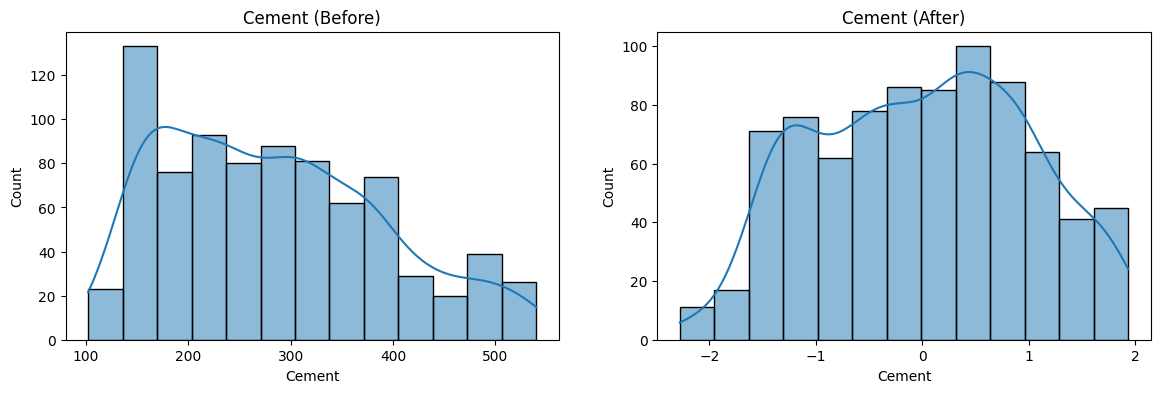

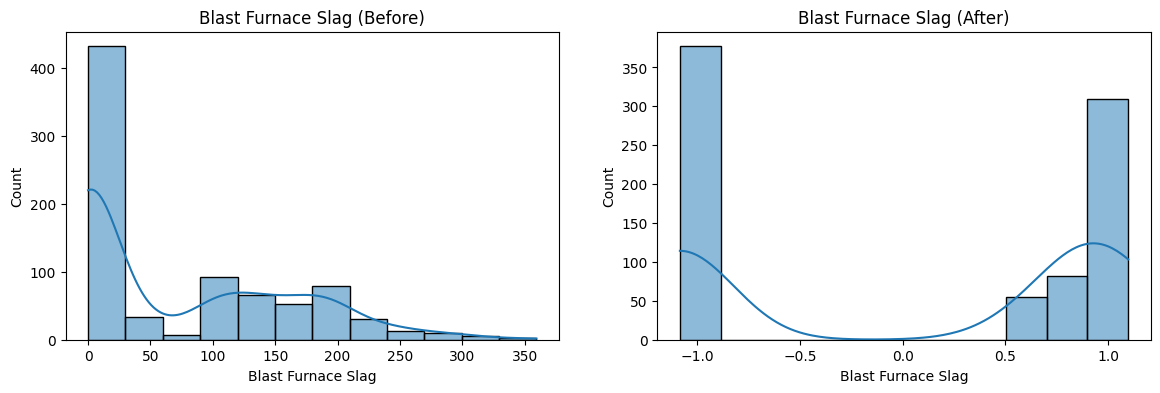

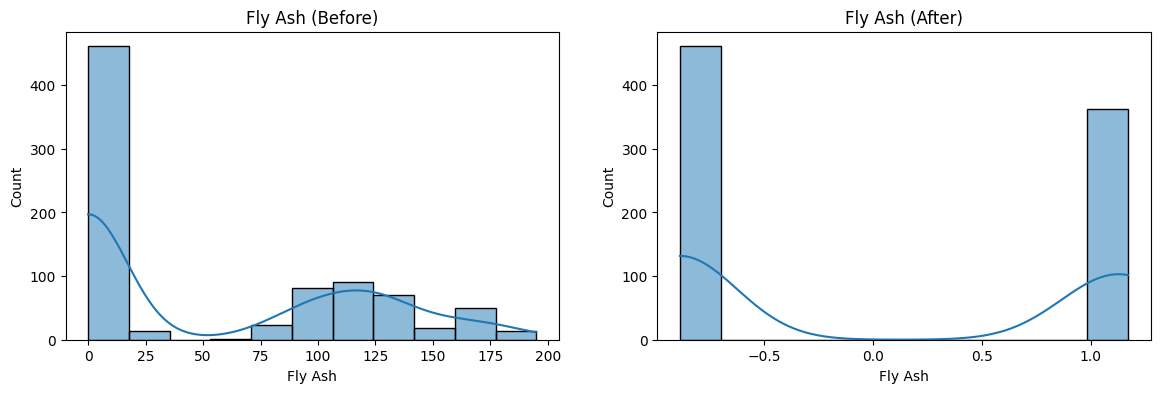

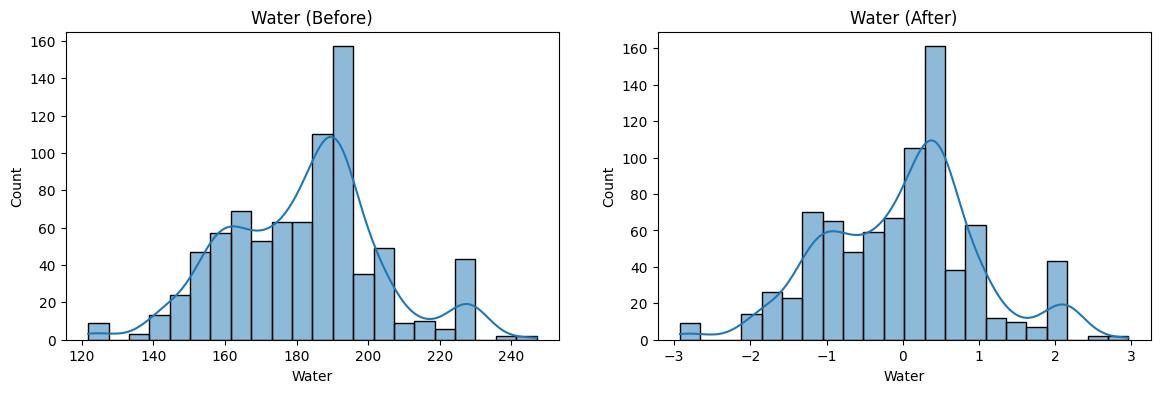

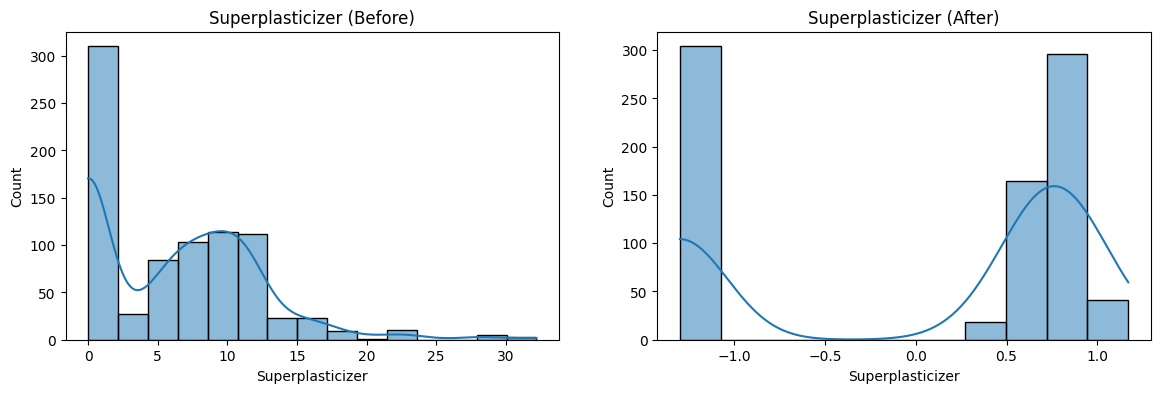

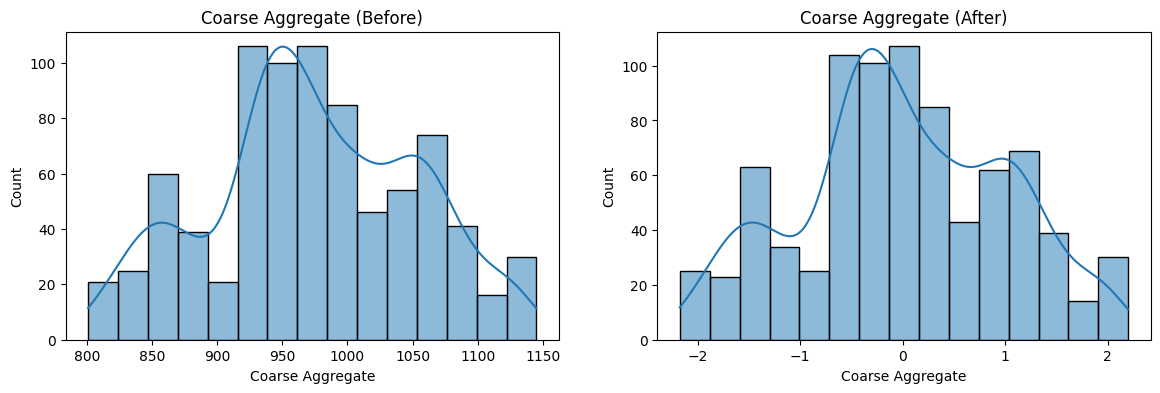

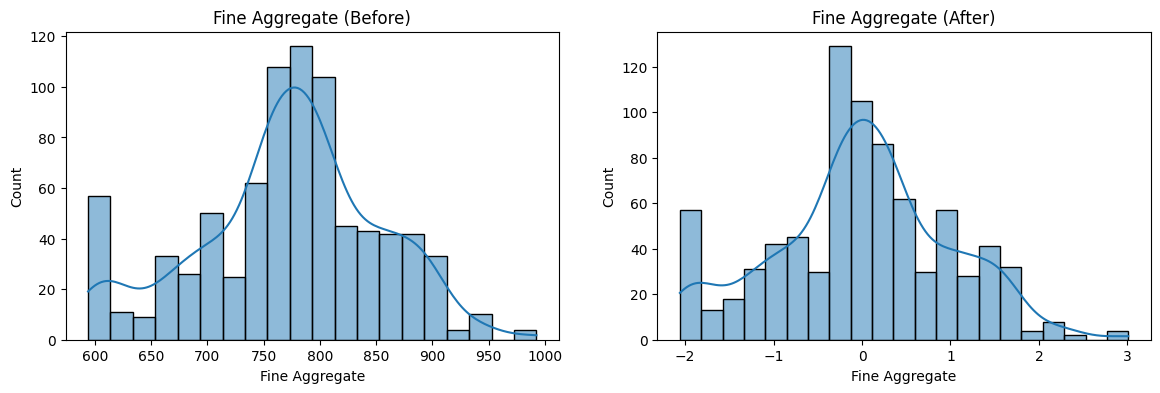

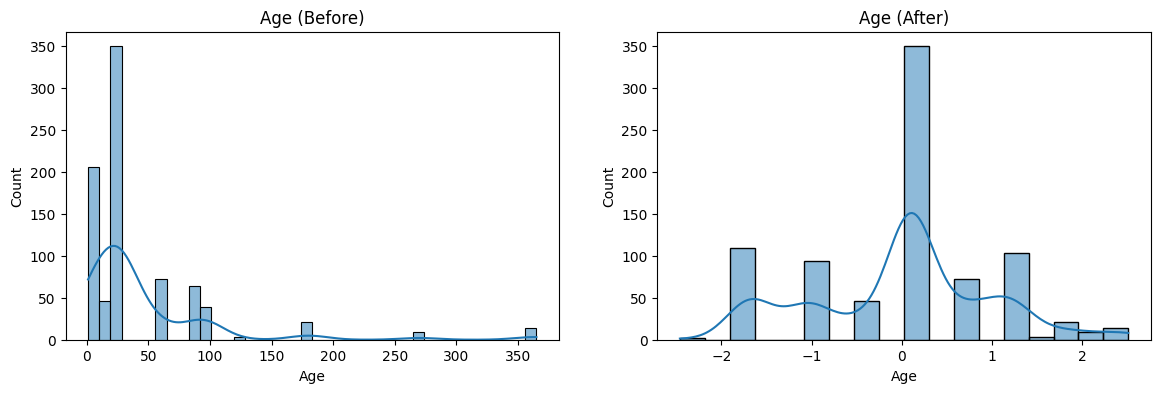

In [46]:
# before and after comparison for box-cox plot
x_train_transformed = pd.DataFrame(
    x_train_transformed,
    columns=x_train.columns
)

for col in x_train_transformed.columns:
    plt.figure(figsize=(14,4))

    plt.subplot(1,2,1)
    sns.histplot(x_train[col], kde=True)
    plt.title(f"{col} (Before)")

    plt.subplot(1,2,2)
    sns.histplot(x_train_transformed[col], kde=True)
    plt.title(f"{col} (After)")

    plt.show()


In [47]:
# apply Yeo-johnson Transform
pt1=PowerTransformer()
x_train_transformed2=pt1.fit_transform(x_train)
x_test_transformed2=pt1.transform(x_test)

lr=LinearRegression()

lr.fit(x_train_transformed2,y_train)

y_pred3=lr.predict(x_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':x_train.columns,'box_cox_lambda':pt.lambdas_})


0.8161906512004999


,cols,box_cox_lambda
0,Cement,0.172271
1,Blast Furnace Slag,0.028052
2,Fly Ash,-0.037072
3,Water,0.809568
4,Superplasticizer,0.114979
5,Coarse Aggregate,1.129168
6,Fine Aggregate,1.829625
7,Age,0.048975


In [49]:
# applying cross val score
pt1=PowerTransformer()
x_transformed2=pt1.fit_transform(x)

lr=LinearRegression()
c=(np.mean(cross_val_score(lr,x_transformed2,y,scoring='r2')))
value3=float(c)
value3

0.6834625141500866

In [50]:
x_train_transformed2=pd.DataFrame(x_train_transformed2,columns=x_train.columns)

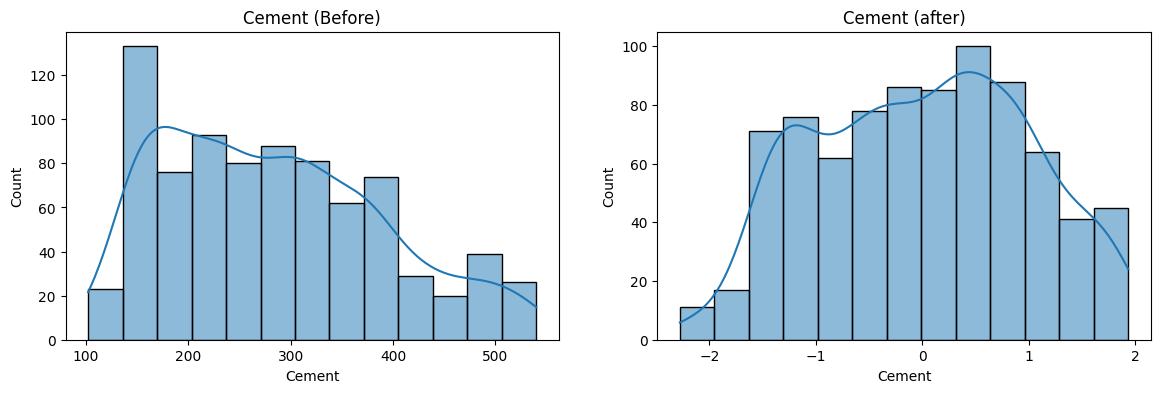

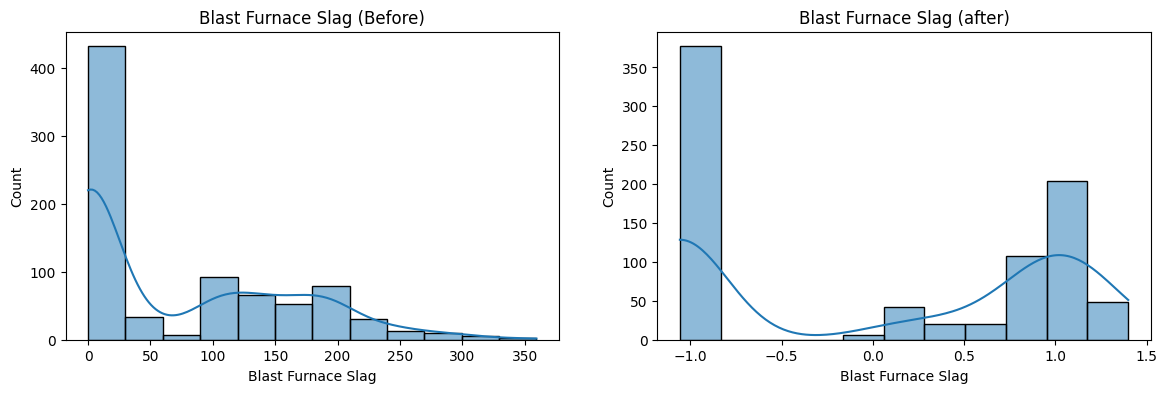

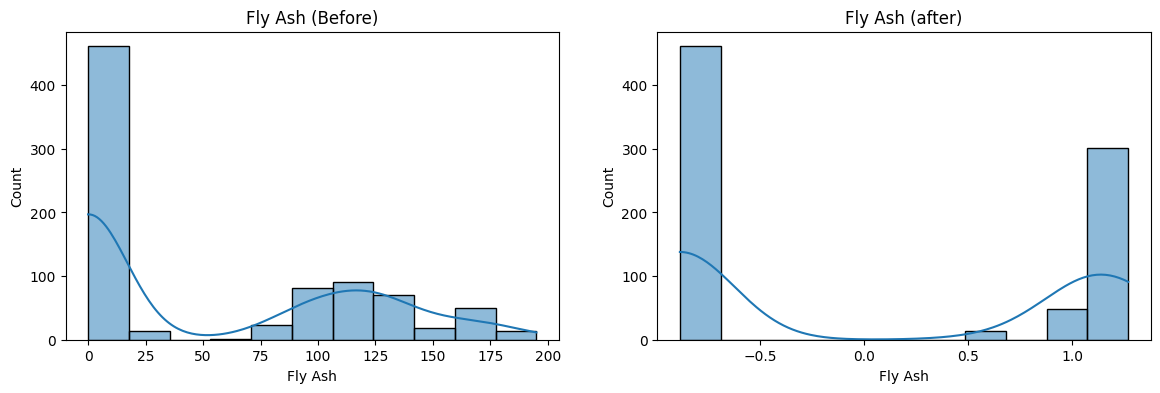

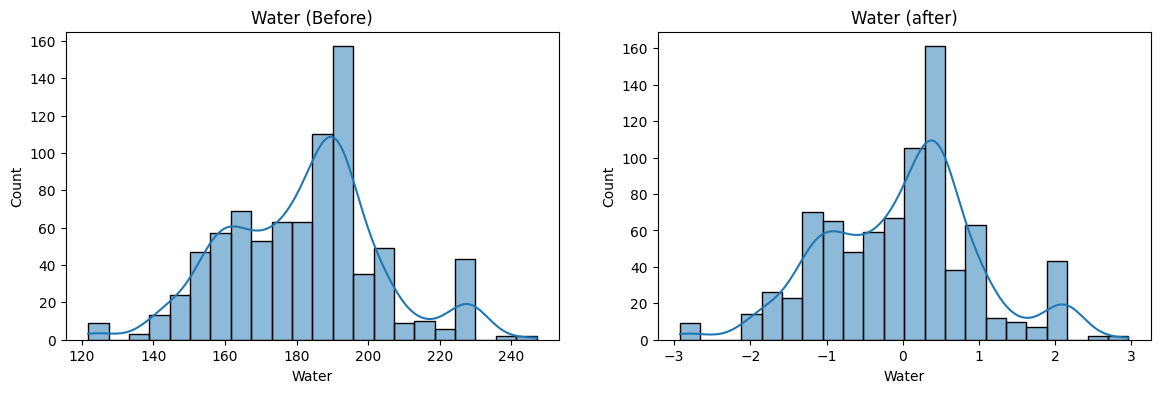

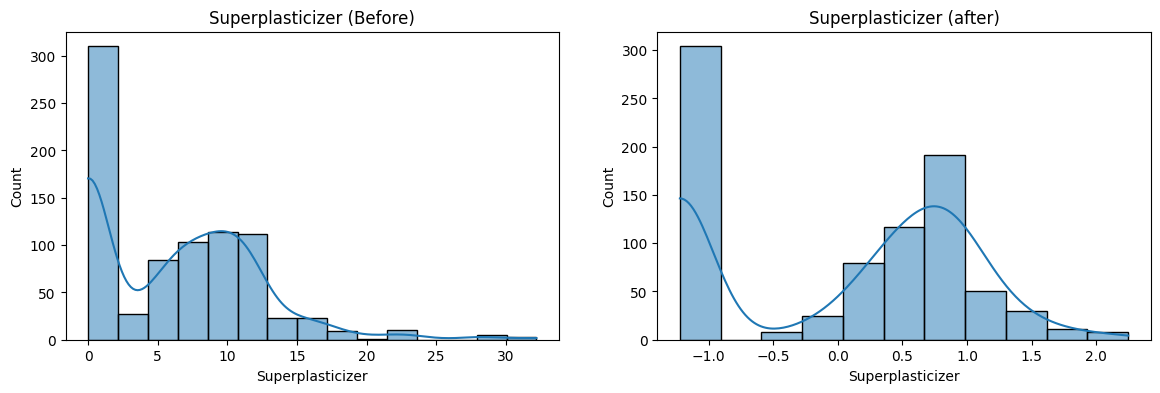

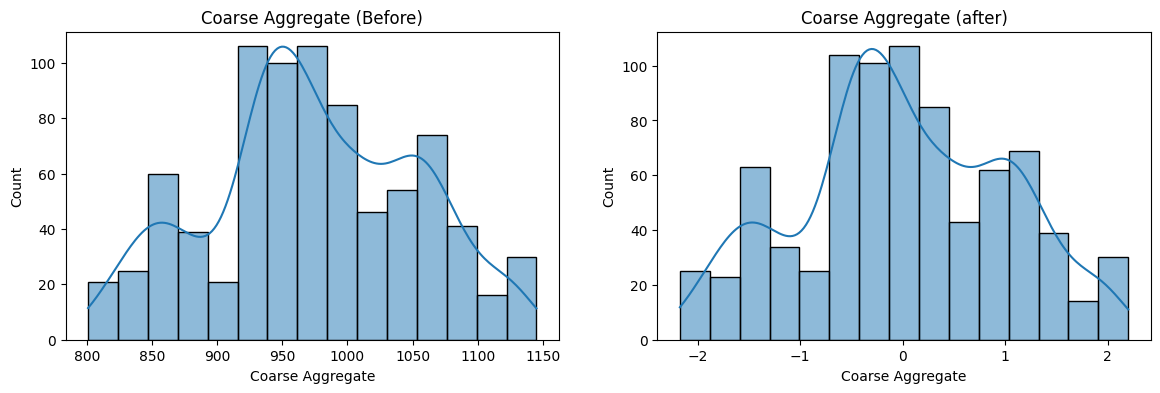

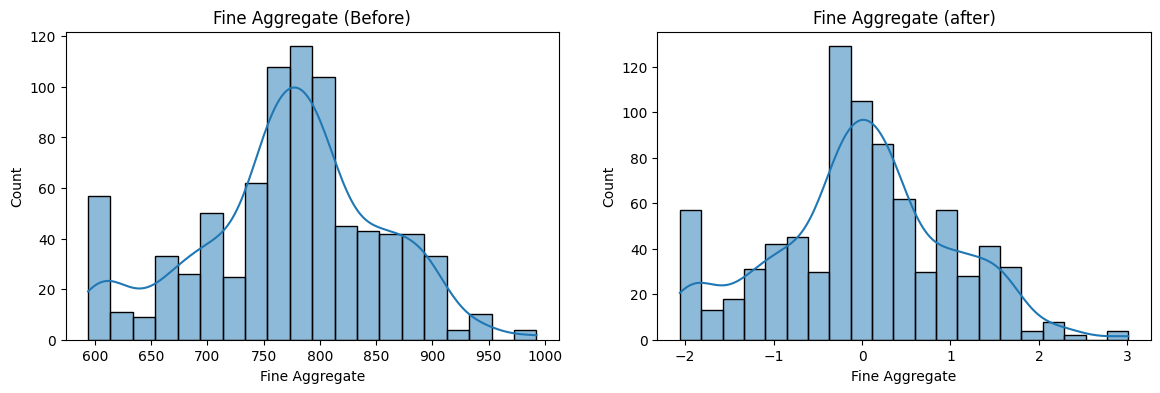

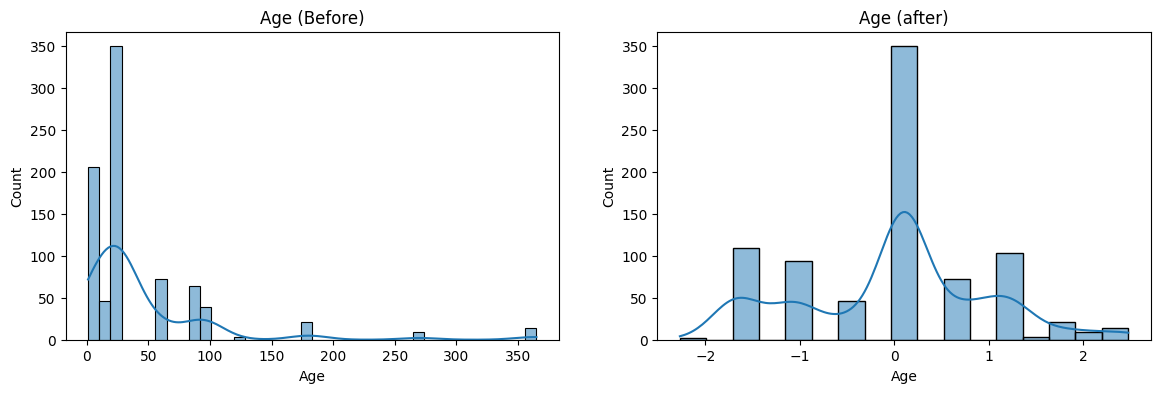

In [51]:
# before and after comparision for yeo-johnson
for col in x_train_transformed2.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(1,2,1)
  sns.histplot(x_train[col],kde=True)
  plt.title(f"{col} (Before)")
  plt.subplot(1,2,2)
  sns.histplot(x_train_transformed2[col],kde=True)
  plt.title(f"{col} (after)")
